In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join as pjoin

from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint

import tensorflow as tf
from keras import backend as K

In [2]:
from dataloader import section_loader_ts_n2n, F3_generator
from models import BAtrousUnetConvLSTM_NtoN
from metrics import mIoU
from loss import *
from utils import make_aug, PlotHistory

In [3]:
idd=19

ts = 4 # windows
type_aug = "aug1" #no_aug, aug1

model_name = "b_atrous_unetconvlstm2_n2n"
mode = "par"
f_conv = 32
f_convlstm = 32
 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

### Modeling

In [4]:
model = BAtrousUnetConvLSTM_NtoN(n_classes=6, filters=f_conv, filters_lstm=f_convlstm, ts=ts, mode=mode)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 4, None, None 0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 4, None, None 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 4, None, None 128         time_distributed_1[0][0]         
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 4, None, None 0           batch_normalization_1[0][0]      
_____________________________________

In [5]:
path_res = '/scratch/parceirosbr/maykol.trinidad/DL_project/res'
name_weight = '{}_{}_ts{}_{}_{}_f{}_fbn{}_fl.h5'.format(model_name, idd, ts, type_aug, mode, f_conv, f_convlstm)
filepath = pjoin(path_res, name_weight)

In [6]:
model.load_weights(filepath)

### Testing

In [7]:
from dataloader import section_loader_test_ts_n2n
from utils import calculate_metrics_total

In [8]:
root = '/scratch/parceirosbr/maykol.trinidad/dataset/F3'
labels1  = np.load(pjoin(root,'test_once', 'test1_labels.npy' ))
labels2  = np.load(pjoin(root,'test_once', 'test2_labels.npy' ))

In [9]:
labels_predict1 = section_loader_test_ts_n2n(model, 'test1', window=ts, get_prob=False)

In [10]:
labels_predict2 = section_loader_test_ts_n2n(model, 'test2', window=ts, get_prob=False)

In [11]:
calculate_metrics_total(labels1, labels_predict1, labels2, labels_predict2)

Accuracy 1:  0.939
Accuracy 2:  0.9451
Pixel Accuracy:  0.9418
Mean Class Accuracy:  0.8482
FWIOU:  0.8945
Class Accuracy:  [0.595 0.825 0.789 0.987 0.916 0.977]
mIoU:  0.7768599594489459


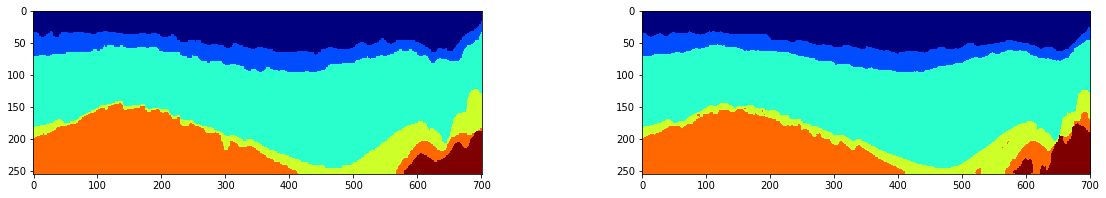

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,3))
axs[0].imshow(labels1[99].T, cmap='jet')
axs[1].imshow(labels_predict1[99].T, cmap='jet')
plt.show()